In [22]:
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd
import json
import operator
from tqdm import tqdm_notebook as tqdm
from pprint import pprint
import plotly
import plotly.graph_objects as go

In [23]:
#Reading carriers data csv 
city_data = "Resources/Houston Data/HOUMergeCleanFINAL.csv"
city_data = pd.read_csv(city_data ,encoding="utf-8")
city_data

,Departure City,City ID,City Name,Airport Name,Iata Code,Country Name,City ID Departure,Min Price,Airline ID,Non-Stop Flight,Departure Date,Quote ID,Airline Name
0,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,454,1276,False,12/1/2019,1,Japan Airlines
1,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,487,1467,False,12/4/2019,2,Spirit Airlines
2,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,684,1065,False,12/12/2019,3,Frontier Airlines
3,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,918,898,False,12/14/2019,4,EVA Air
4,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,1022,1276,False,12/20/2019,5,Japan Airlines
5,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,500,835,False,12/25/2019,6,Air Canada
6,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,674,898,False,12/26/2019,7,EVA Air
7,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,619,835,False,12/27/2019,8,Air Canada
8,Houston,56615,Hong Kong,Hong Kong International,HKG,Hong Kong,58440,487,929,False,12/31/2019,9,Air China
9,Houston,42795,Bangkok,Bangkok Suvarnabhumi,BKK,Thailand,58440,494,1713,False,12/1/2019,1,Singapore Airlines


In [24]:
city_data= city_data.rename({'City Name': 'Destination'}, axis=1)

In [25]:
# Average price to each destination
groupy_city_table=pd.DataFrame(city_data.groupby('Destination')['Min Price'].mean())
groupy_city_table.round(decimals=2)
groupy_city_table.reset_index(inplace=True)
groupy_city_table.columns = ['Destination', 'Average Price']
groupy_city_table['Average Price'] = groupy_city_table['Average Price'].round(2)
groupy_city_table = groupy_city_table.sort_values(["Average Price"], ascending=False)
groupy_city_table.head()

,Destination,Average Price
6,Brussels,2294.50
37,Stockholm,2055.11
32,Rio De Janeiro,1815.60
29,Paris,1732.34
5,Berlin,1464.00


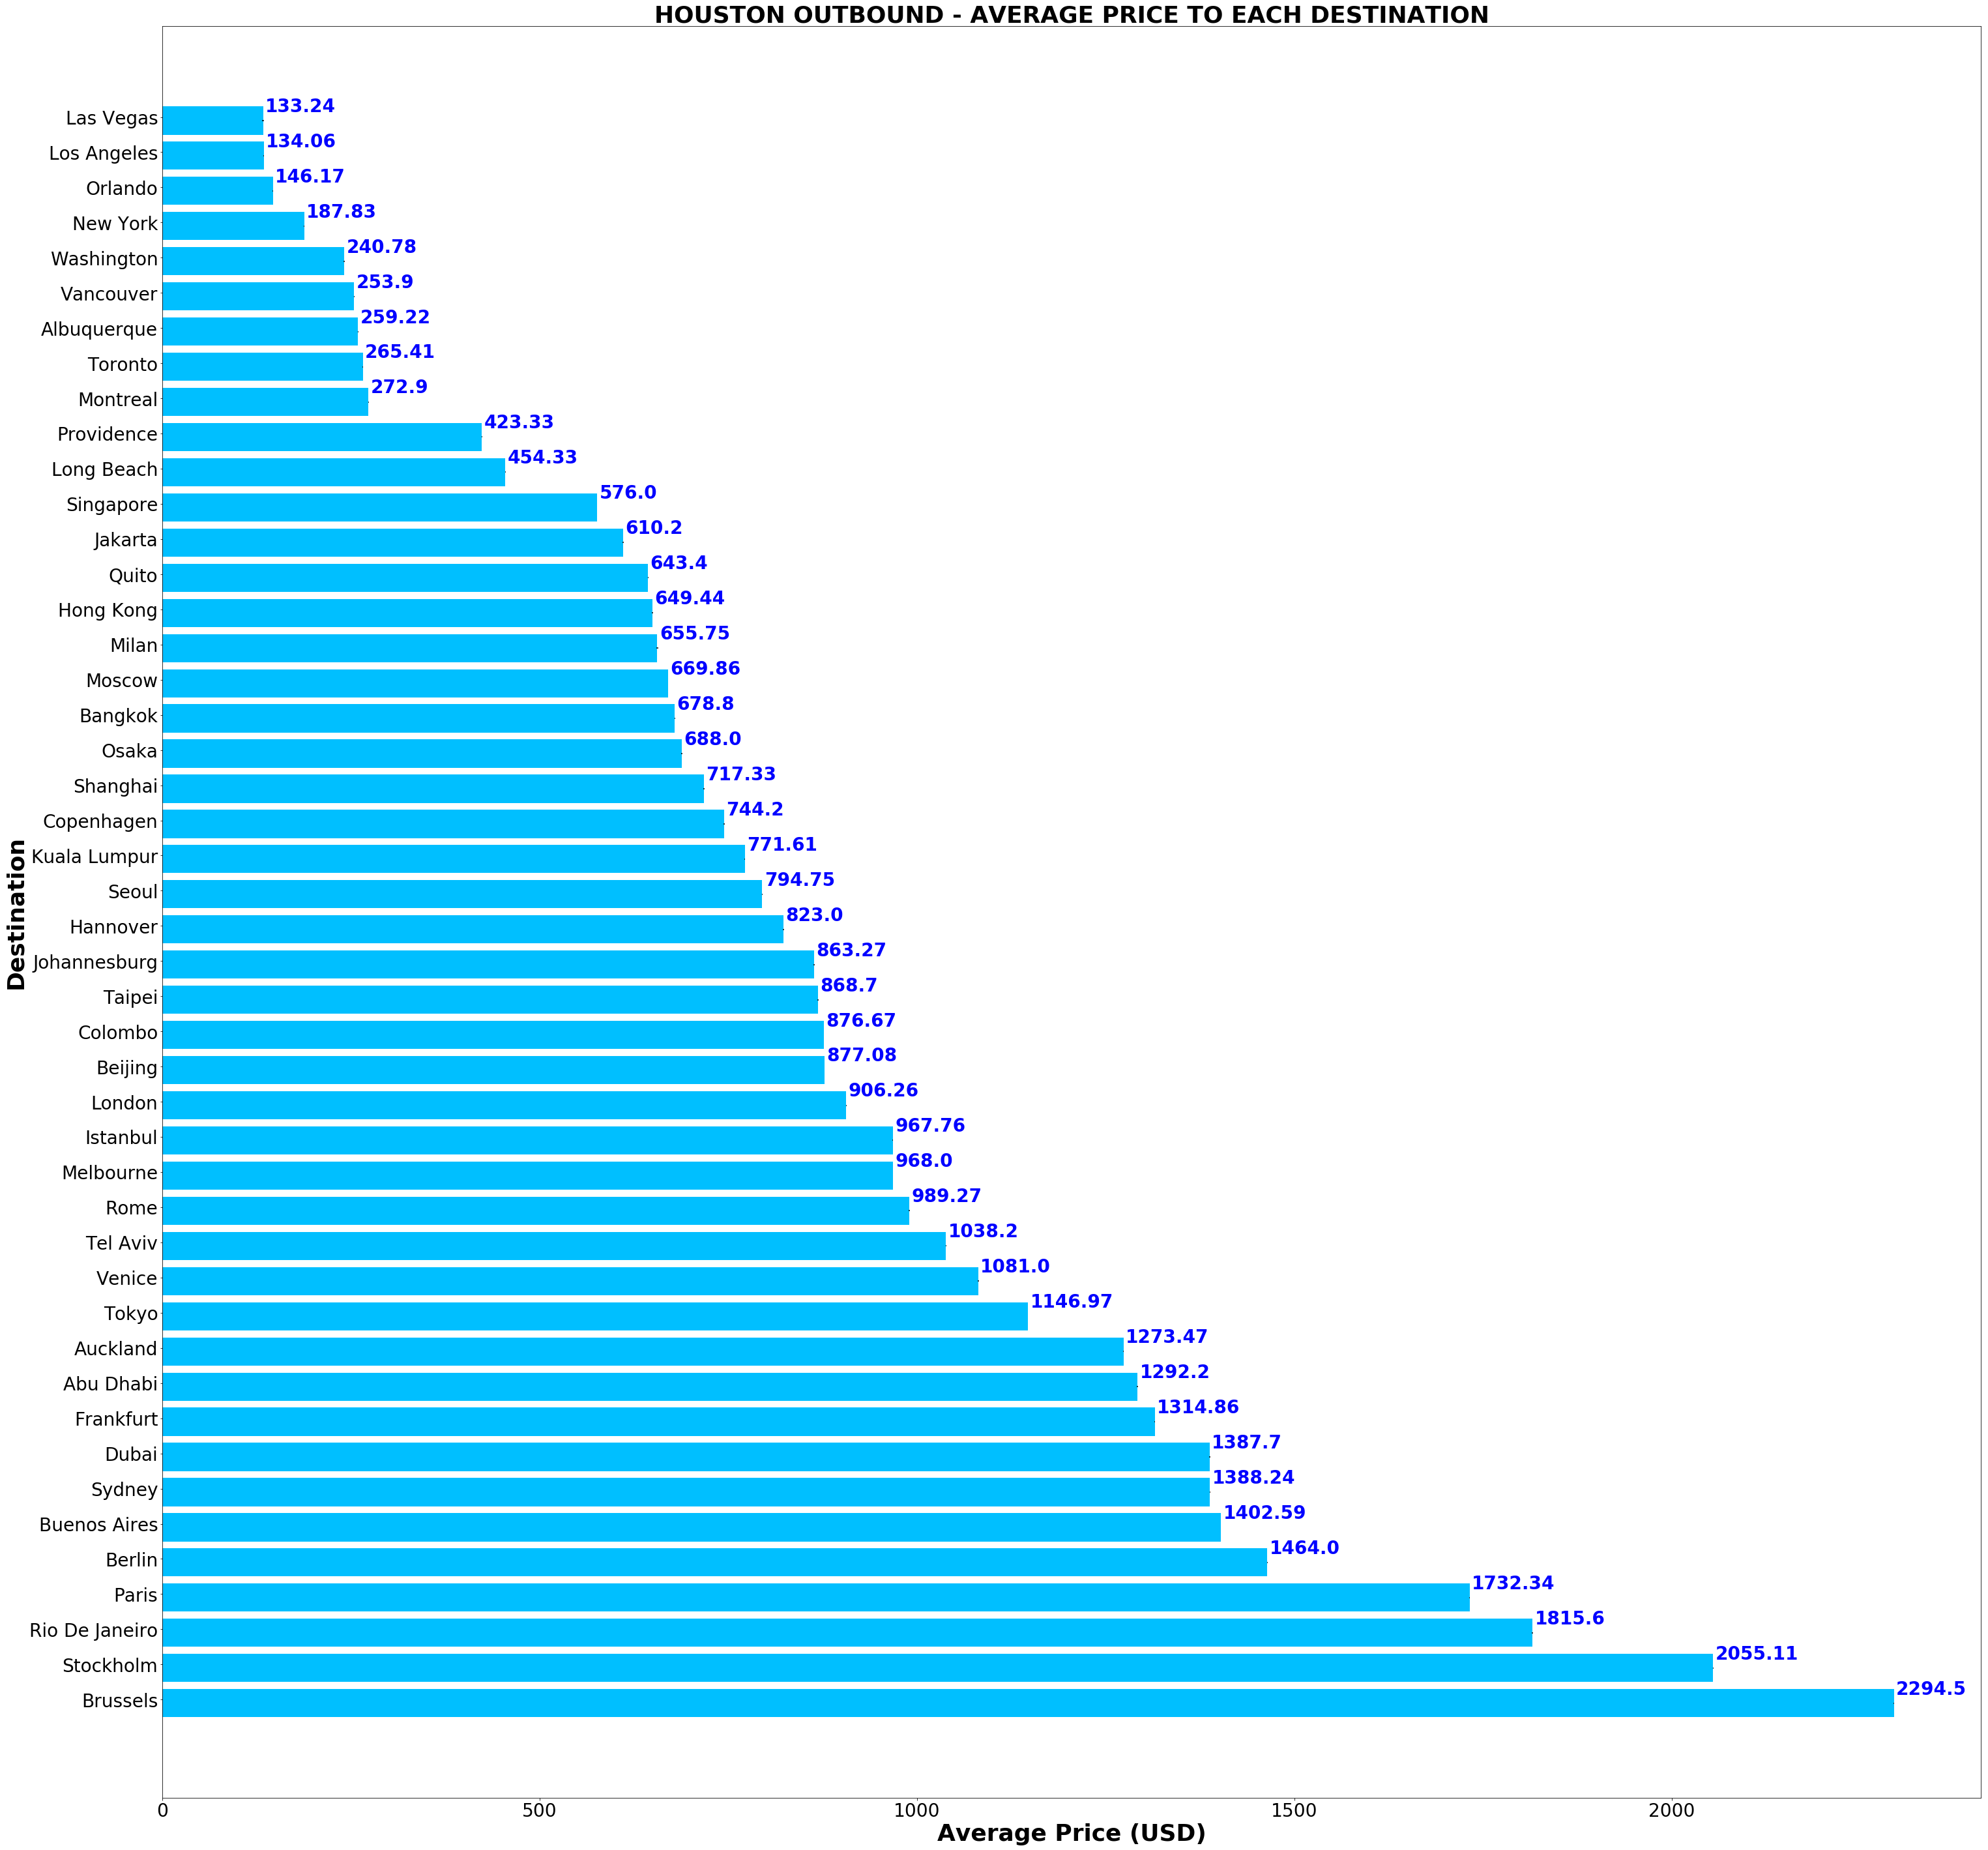

In [26]:
#groupy_city_table['Average Price'] = groupy_city_table['Average Price'].map("{:,.2f}".format)

plt.figure(figsize=(50,50))
plt.rcParams.update({'font.size': 40})
destination = np.arange(len(groupy_city_table))
price = groupy_city_table["Average Price"]
error = np.random.rand(len(destination))

plt.barh(destination, price, xerr=error, align='center', color = 'deepskyblue')
tick_locations = [value+0.1 for value in destination]
plt.yticks(tick_locations, groupy_city_table["Destination"], rotation="horizontal")
plt.title("HOUSTON OUTBOUND - AVERAGE PRICE TO EACH DESTINATION",fontsize = 36, fontweight = 'bold')
plt.ylabel("Destination", fontsize = 36, fontweight = 'bold')
plt.xlabel("Average Price (USD)", fontsize = 36, fontweight = 'bold')
plt.xticks(fontsize=28)  
plt.yticks(fontsize=28)   

for i, v in enumerate(price):
    plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold', size = 28)

plt.savefig("images/averagepricetoeachdestination.png", bbox_inches="tight")
plt.show()

In [27]:
#import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=groupy_city_table["Average Price"],y=groupy_city_table["Destination"],orientation='h'))

fig.show()

In [28]:
recommendation_Int = groupy_city_table[(groupy_city_table['Average Price'] >= 500) & (groupy_city_table['Average Price'] <= 1000)]
recommendation_dom = groupy_city_table[(groupy_city_table['Average Price'] < 500)]

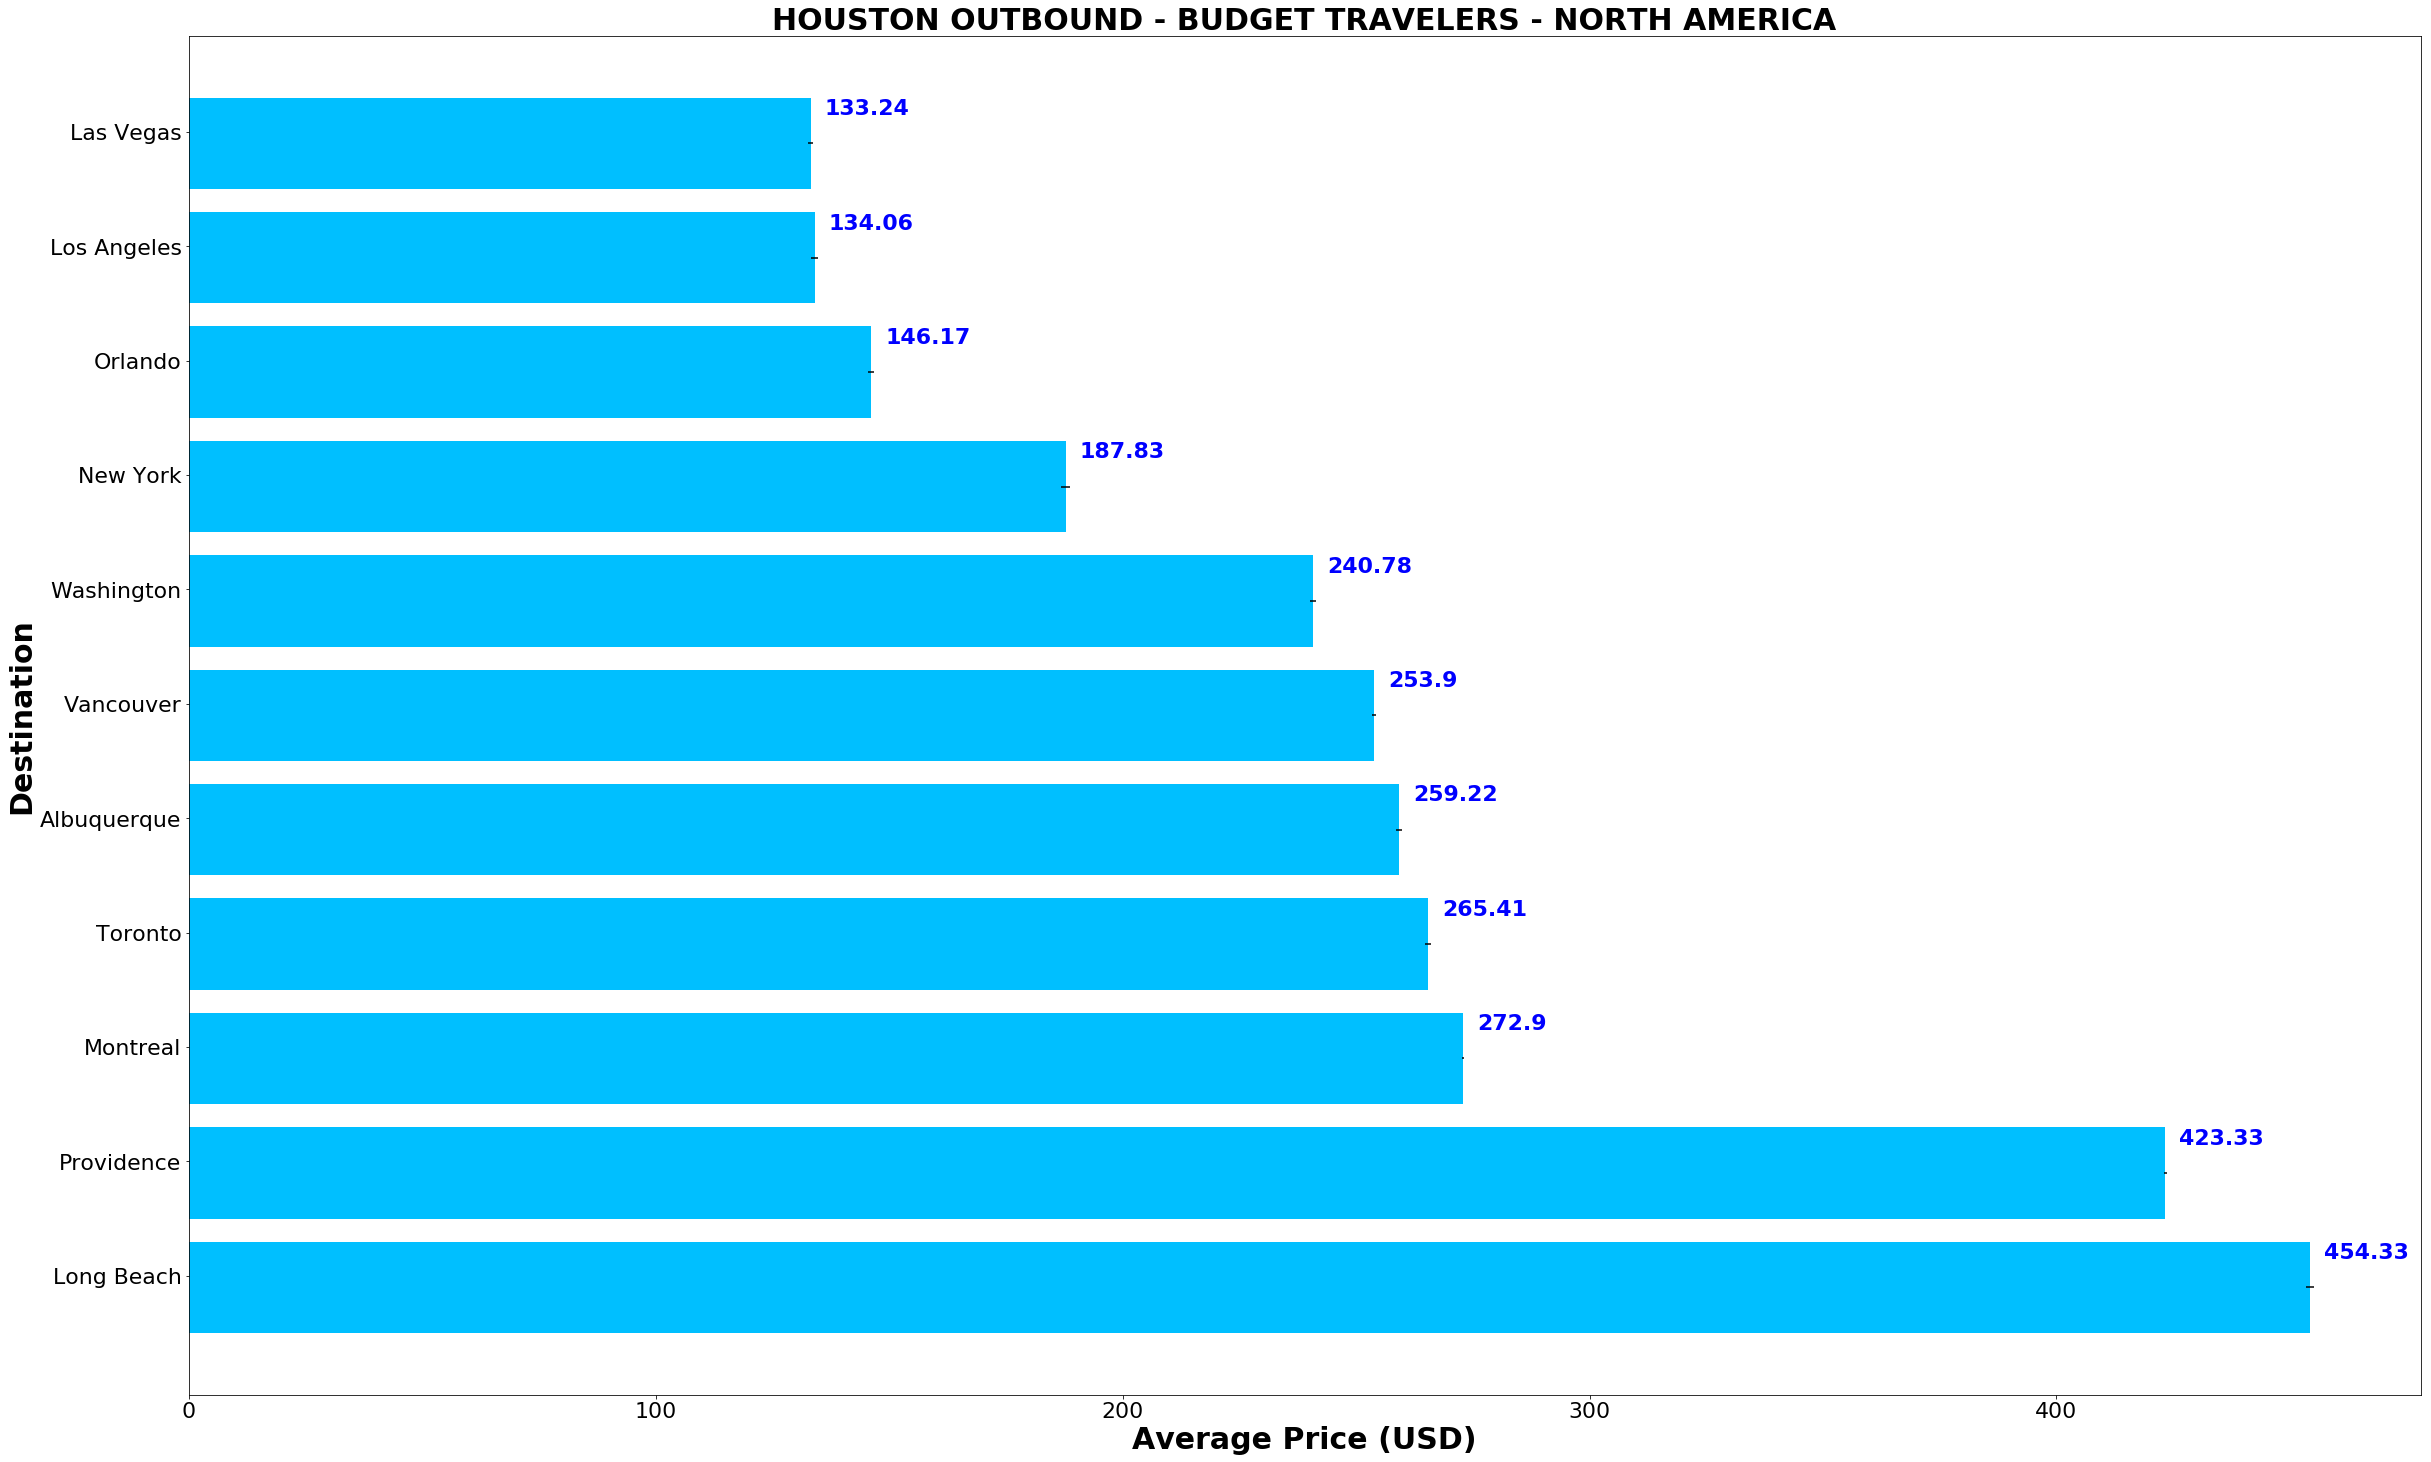

In [29]:
#For Budget Traveller
plt.figure(figsize=(40,25))
plt.rcParams.update({'font.size': 30})
destination = np.arange(len(recommendation_dom))
price = recommendation_dom["Average Price"]
error = np.random.rand(len(destination))

plt.barh(destination, price, xerr=error, align='center',color = 'deepskyblue')
tick_locations = [value+0.1 for value in destination]
plt.yticks(tick_locations, recommendation_dom["Destination"], rotation="horizontal")
plt.title("HOUSTON OUTBOUND - BUDGET TRAVELERS - NORTH AMERICA",fontsize = 30, fontweight = 'bold')
plt.ylabel("Destination",fontsize = 30, fontweight = 'bold')
plt.xlabel("Average Price (USD)",fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize=22)  
plt.yticks(fontsize=22)  

for i, v in enumerate(price):
    plt.text(v + 3, i + .25, str(v), color='blue', fontweight='bold',size = 22)

plt.savefig("images/budgettravelersnorthamerica.png", bbox_inches="tight")
plt.show()

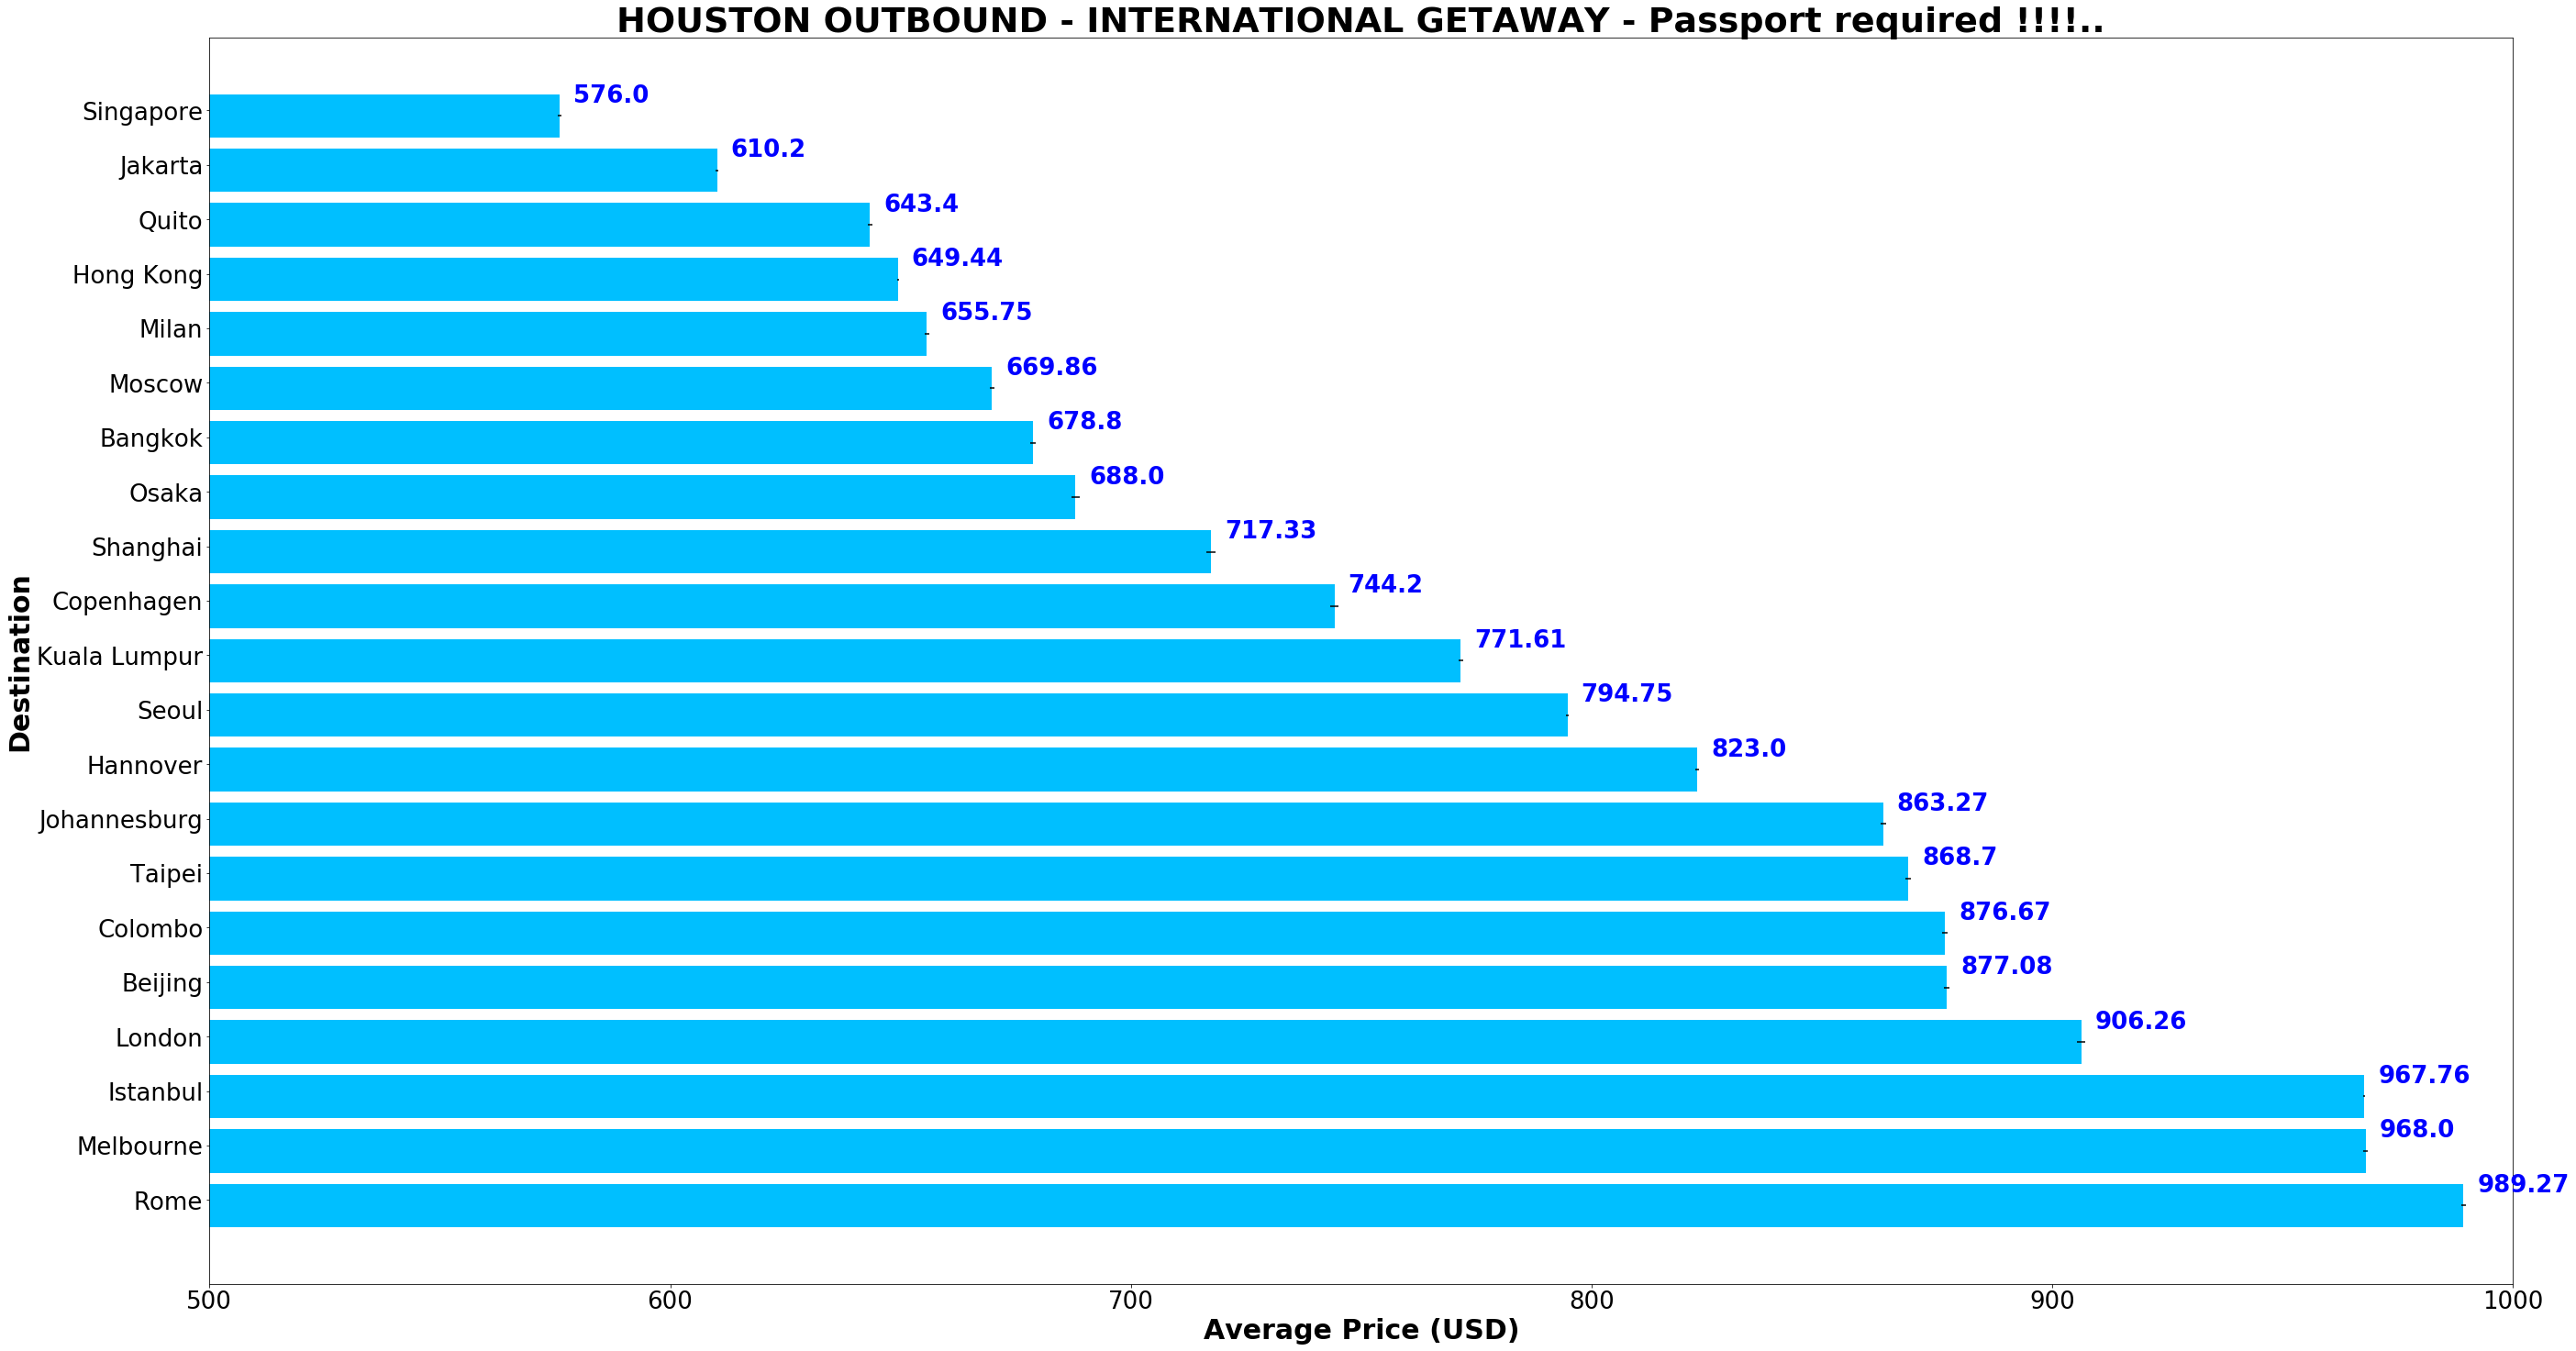

In [30]:
#For International Getaway - Passport required...

plt.figure(figsize=(45,25))
plt.rcParams.update({'font.size': 30})
destination = np.arange(len(recommendation_Int))
price = recommendation_Int["Average Price"]
error = np.random.rand(len(destination))

plt.barh(destination, price, xerr=error, align='center',color = 'deepskyblue')
tick_locations = [value+0.1 for value in destination]
plt.yticks(tick_locations, recommendation_Int["Destination"], rotation="horizontal")
plt.title("HOUSTON OUTBOUND - INTERNATIONAL GETAWAY - Passport required !!!!..",fontsize = 38, fontweight = 'bold')
plt.ylabel("Destination",fontsize = 30, fontweight = 'bold')
plt.xlabel("Average Price (USD)",fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize=26)  
plt.yticks(fontsize=26)  
plt.xlim(500,1000)

for i, v in enumerate(price):
    plt.text(v + 3, i + .25, str(v), color='blue',fontweight = 'bold',size = 26)

plt.savefig("images/internationalgetaway.png", bbox_inches="tight")
plt.show()

In [31]:
# Quote counts from Houston to each destination:
groupby_airline_count_table=pd.DataFrame(city_data.groupby('Destination')['Airline Name'].count())
groupby_airline_count_table.reset_index(inplace=True)
groupby_airline_count_table.columns = ['Destination', 'Quotes Available']
groupby_airline_count_table = groupby_airline_count_table.sort_values(["Quotes Available"], ascending=False)
groupby_airline_count_table.head()

,Destination,Quotes Available
19,London,50
16,Johannesburg,44
29,Paris,44
2,Auckland,43
43,Vancouver,41


In [32]:
#Largest 10
Largest10=groupby_airline_count_table.nlargest(10, ['Quotes Available']) 

#Lowest 10
Lowest10=groupby_airline_count_table.nsmallest(10, ['Quotes Available'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

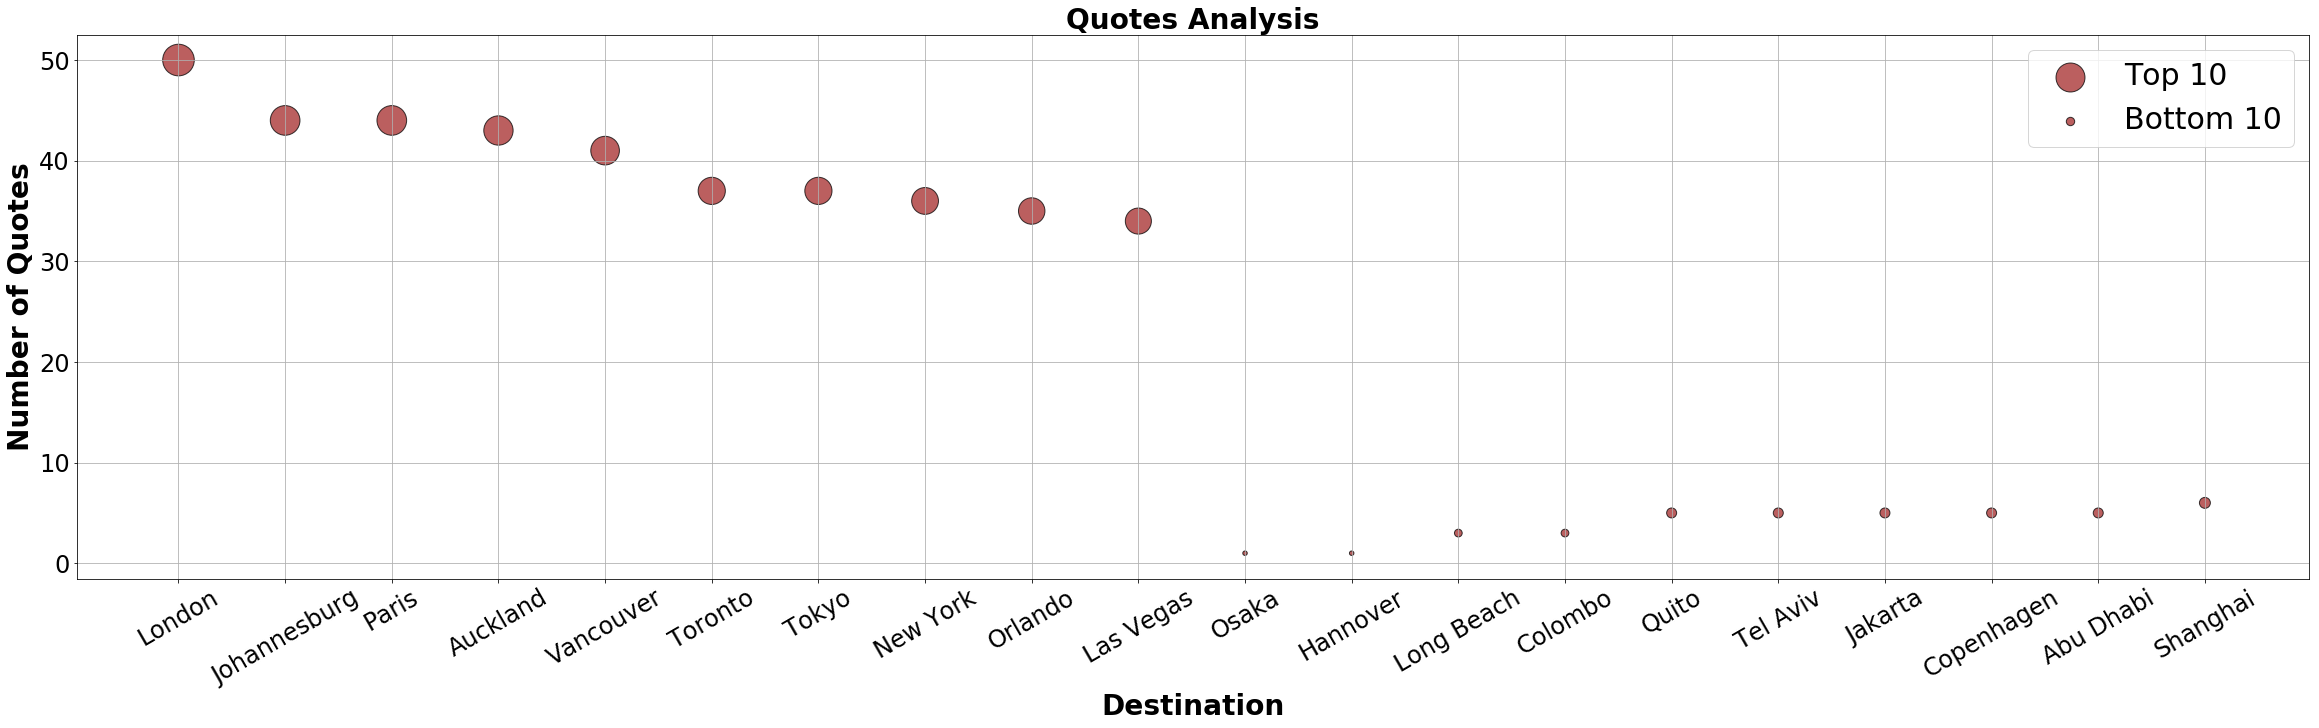

In [33]:
plt.figure(figsize=(40,10))
plt.rcParams.update({'font.size': 30})
plt.scatter(x=Largest10['Destination'],
            y=Largest10["Quotes Available"],
            facecolor='brown',edgecolor="black", s=Largest10['Quotes Available']*20,
            alpha=0.75,label="Top 10")

plt.scatter(x=Lowest10['Destination'],
            y=Lowest10["Quotes Available"],
            facecolor='brown',edgecolor="black", s=Lowest10['Quotes Available']*20,
            alpha=0.75, label="Bottom 10")

plt.grid()
plt.xlabel("Destination",fontsize = 28, fontweight = 'bold')
plt.ylabel("Number of Quotes",fontsize = 28, fontweight = 'bold')
plt.title("Quotes Analysis",fontsize = 28, fontweight = 'bold')
plt.xticks(fontsize=24)  
plt.yticks(fontsize=24)  
plt.legend()

#plt.text(45,25,"Note: Circle size correlates with quotes avaiable to each destination",fontsize=12)

plt.savefig("images/quotesanalysis.png", bbox_inches="tight")
plt.xticks(rotation=30)

In [34]:
pre_direct_df=city_data[(city_data["Non-Stop Flight"]==True)]
pre_indirect_df=city_data[(city_data["Non-Stop Flight"]==False)]

In [35]:
direct_df=(pre_direct_df.groupby('Destination')['Min Price'].agg(['mean', 'count']))
direct_df.reset_index(inplace=True)
direct_df1=direct_df.sort_values(["mean"], ascending=[False])
direct_df1.columns = ['Destination', "Average Price (Direct)",'Quotes Available (Direct)']
direct_df1.head()

,Destination,Average Price (Direct),Quotes Available (Direct)
15,Rio De Janeiro,2863.000000,5
3,Buenos Aires,2367.500000,6
13,Paris,2005.000000,16
5,Frankfurt,1996.818182,11
18,Tokyo,1657.000000,14


In [36]:
indirect_df=(pre_indirect_df.groupby('Destination')['Min Price'].agg(['mean', 'count'])) #.style.format('{0:,.2f}'))
indirect_df.reset_index(inplace=True)
indirect_df1=indirect_df.sort_values(["mean"], ascending=[False])
indirect_df1.columns = ['Destination', "Average Price (Indirect)",'Quotes Available (Indirect)']
indirect_df1.head()

,Destination,Average Price (Indirect),Quotes Available (Indirect)
6,Brussels,2294.500000,10
37,Stockholm,2055.111111,9
29,Paris,1576.535714,28
10,Dubai,1552.956522,23
5,Berlin,1464.000000,20


In [40]:
city_direct_analysis = pd.merge(direct_df1, indirect_df1, how = 'inner', on = 'Destination' )
city_direct_analysis.head()

,Destination,Average Price (Direct),Quotes Available (Direct),Average Price (Indirect),Quotes Available (Indirect)
0,Rio De Janeiro,2863.000000,5,768.200000,5
1,Buenos Aires,2367.500000,6,876.272727,11
2,Paris,2005.000000,16,1576.535714,28
3,Frankfurt,1996.818182,11,632.909091,11
4,Tokyo,1657.000000,14,836.521739,23


In [42]:
city_direct_analysis['Price Variance'] = city_direct_analysis.apply(lambda row: row["Average Price (Direct)"] - 
                                                                          row["Average Price (Indirect)"], axis = 1) 
city_direct_analysis
variance_df=city_direct_analysis.sort_values(['Price Variance'], ascending=[False])
variance_df

,Destination,Average Price (Direct),Quotes Available (Direct),Average Price (Indirect),Quotes Available (Indirect),Price Variance
0,Rio De Janeiro,2863.000000,5,768.200000,5,2094.800000
1,Buenos Aires,2367.500000,6,876.272727,11,1491.227273
3,Frankfurt,1996.818182,11,632.909091,11,1363.909091
4,Tokyo,1657.000000,14,836.521739,23,820.478261
9,Quito,1035.500000,2,382.000000,3,653.500000
7,London,1125.793103,29,603.095238,21,522.697865
2,Paris,2005.000000,16,1576.535714,28,428.464286
6,Auckland,1491.888889,18,1116.200000,25,375.688889
5,Sydney,1507.125000,8,1282.555556,9,224.569444
11,Taipei,950.083333,12,746.625000,8,203.458333


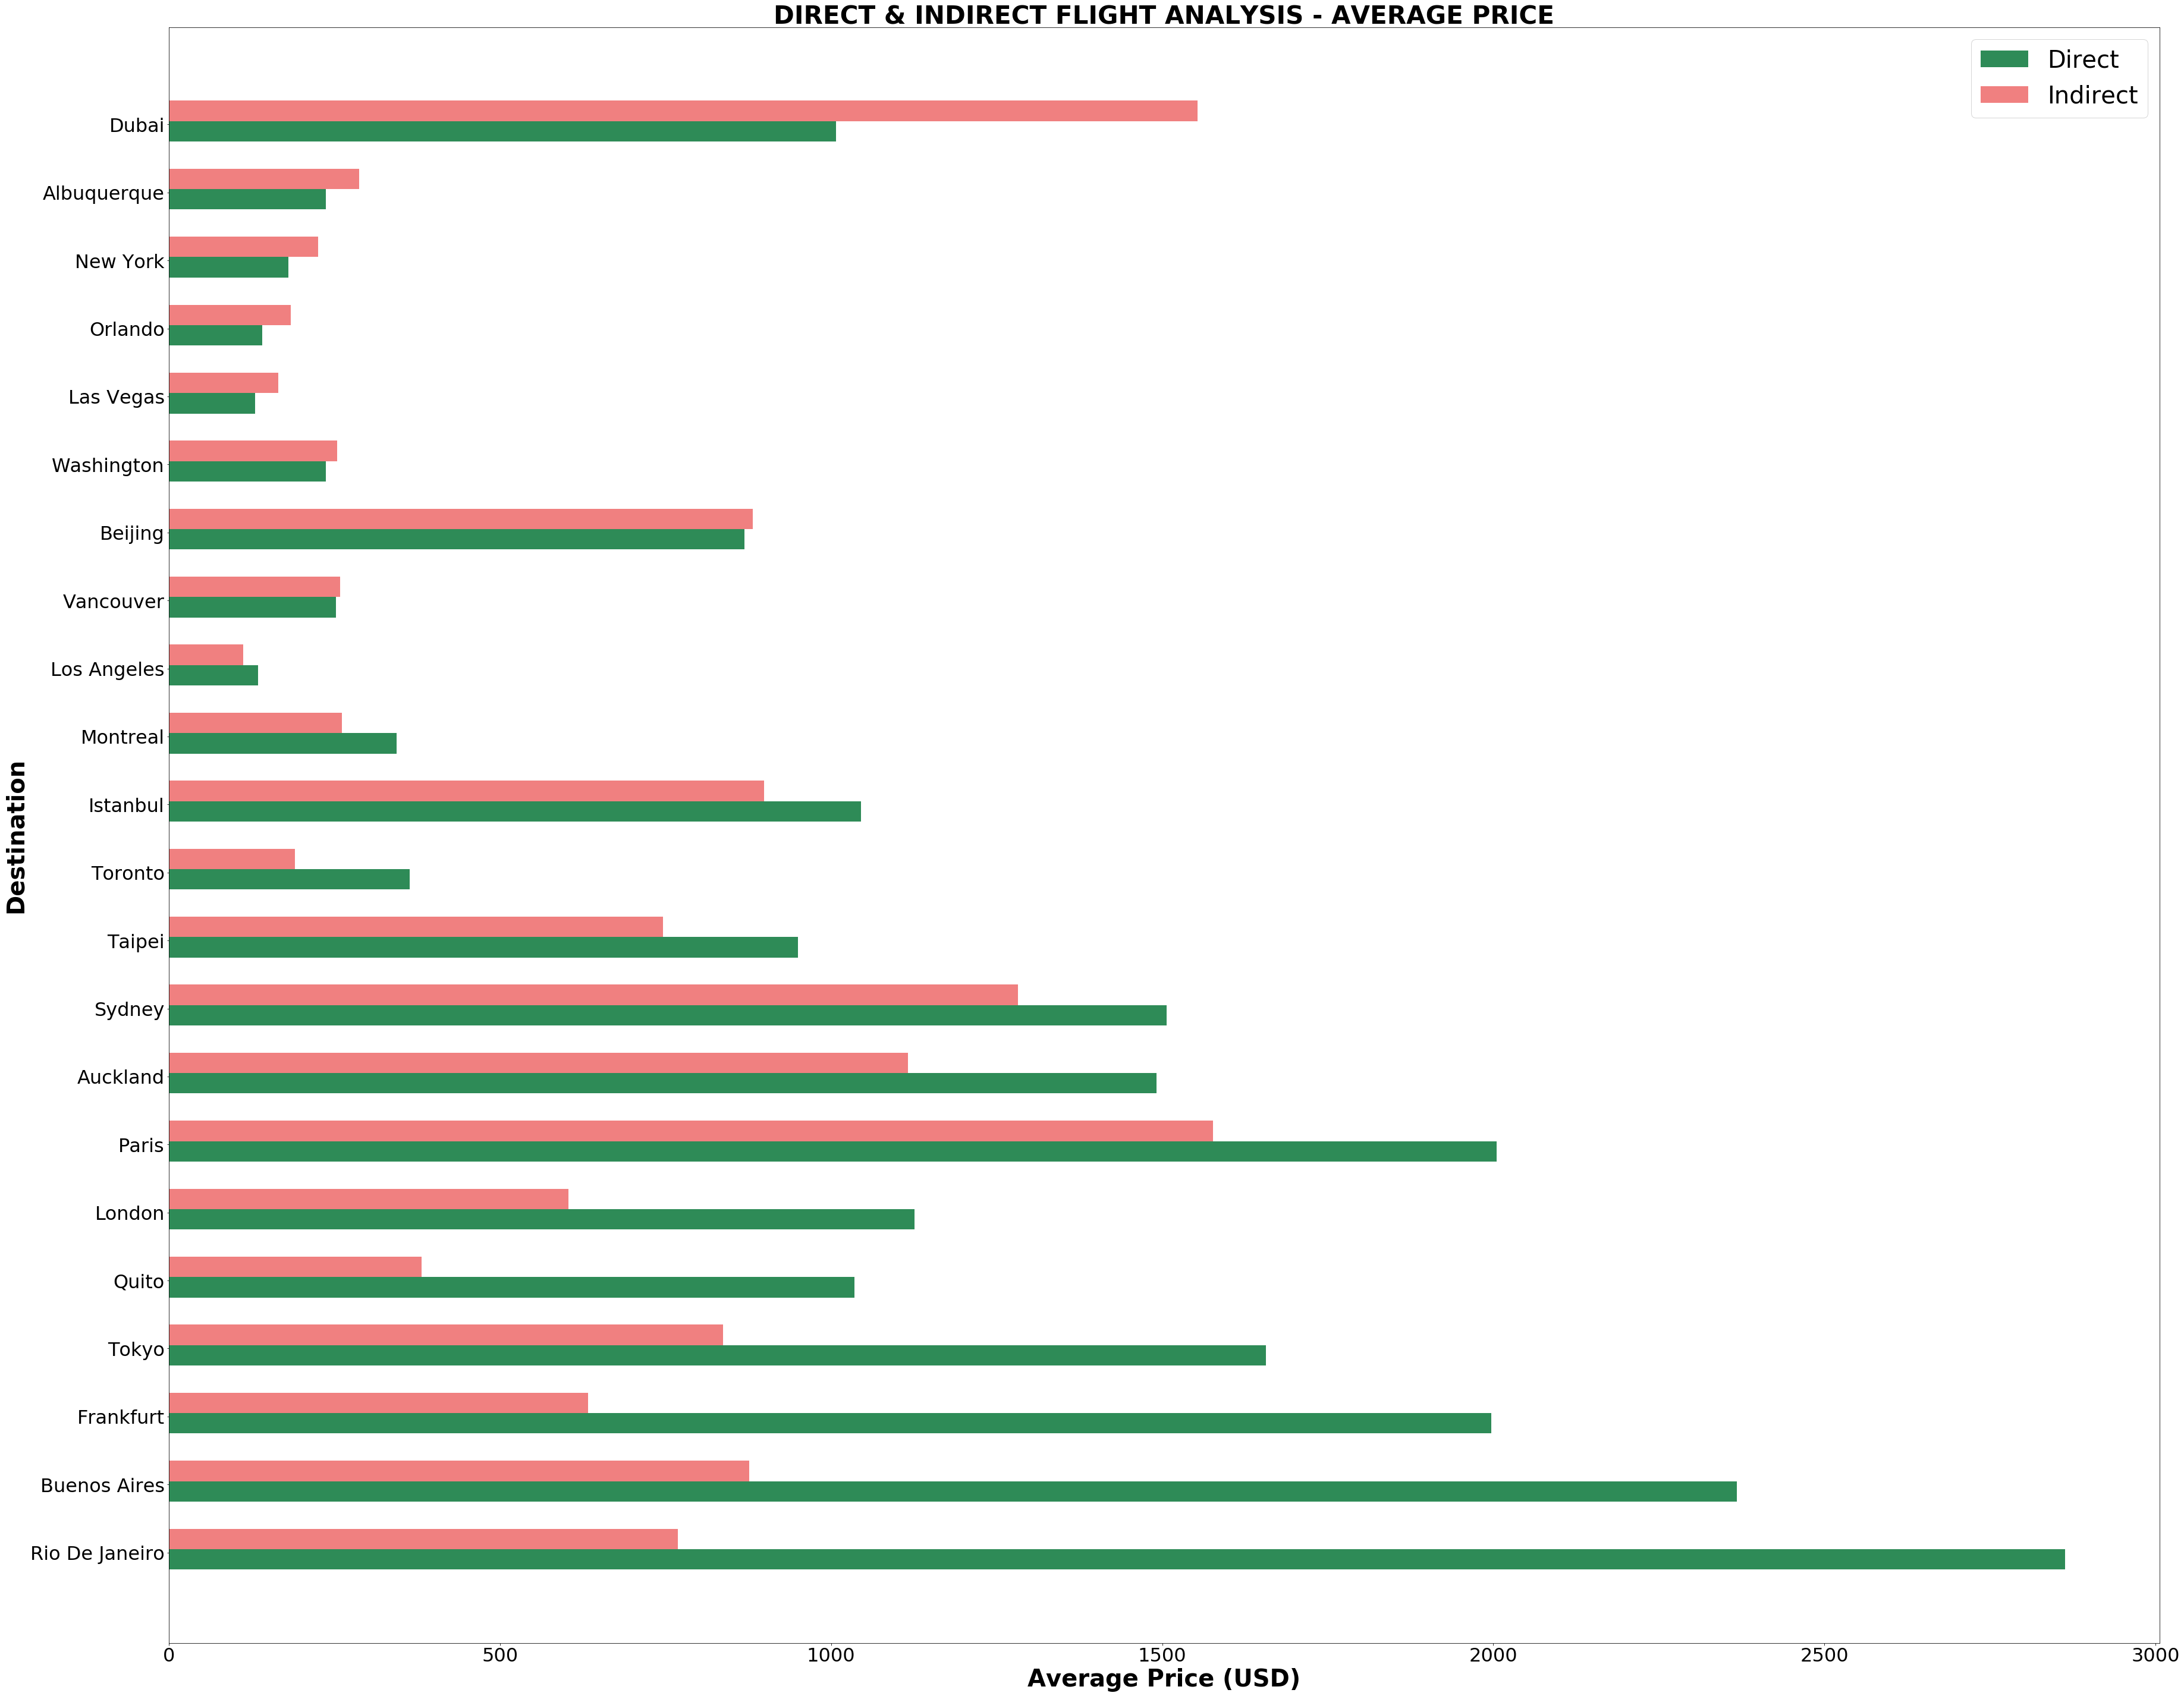

In [43]:
plt.figure(figsize=(60,50))
plt.rcParams.update({'font.size': 40})

destination = np.arange(len(variance_df))

width = 0.3

plt.barh(destination, variance_df["Average Price (Direct)"], width, color='seagreen', label='Direct')
plt.barh(destination + width, variance_df["Average Price (Indirect)"], width, color='lightcoral', label='Indirect')

tick_locations = [value+0.1 for value in destination]
plt.yticks(tick_locations, variance_df["Destination"], rotation="horizontal")

plt.title("DIRECT & INDIRECT FLIGHT ANALYSIS - AVERAGE PRICE",fontsize = 42, fontweight = 'bold')
plt.ylabel("Destination",fontsize = 40, fontweight = 'bold')
plt.xlabel("Average Price (USD)",fontsize = 40, fontweight = 'bold')

plt.xticks(fontsize=32)  
plt.yticks(fontsize=32)

plt.legend()

plt.savefig("images/directindirectflightanalysis.png", bbox_inches="tight")
plt.show()

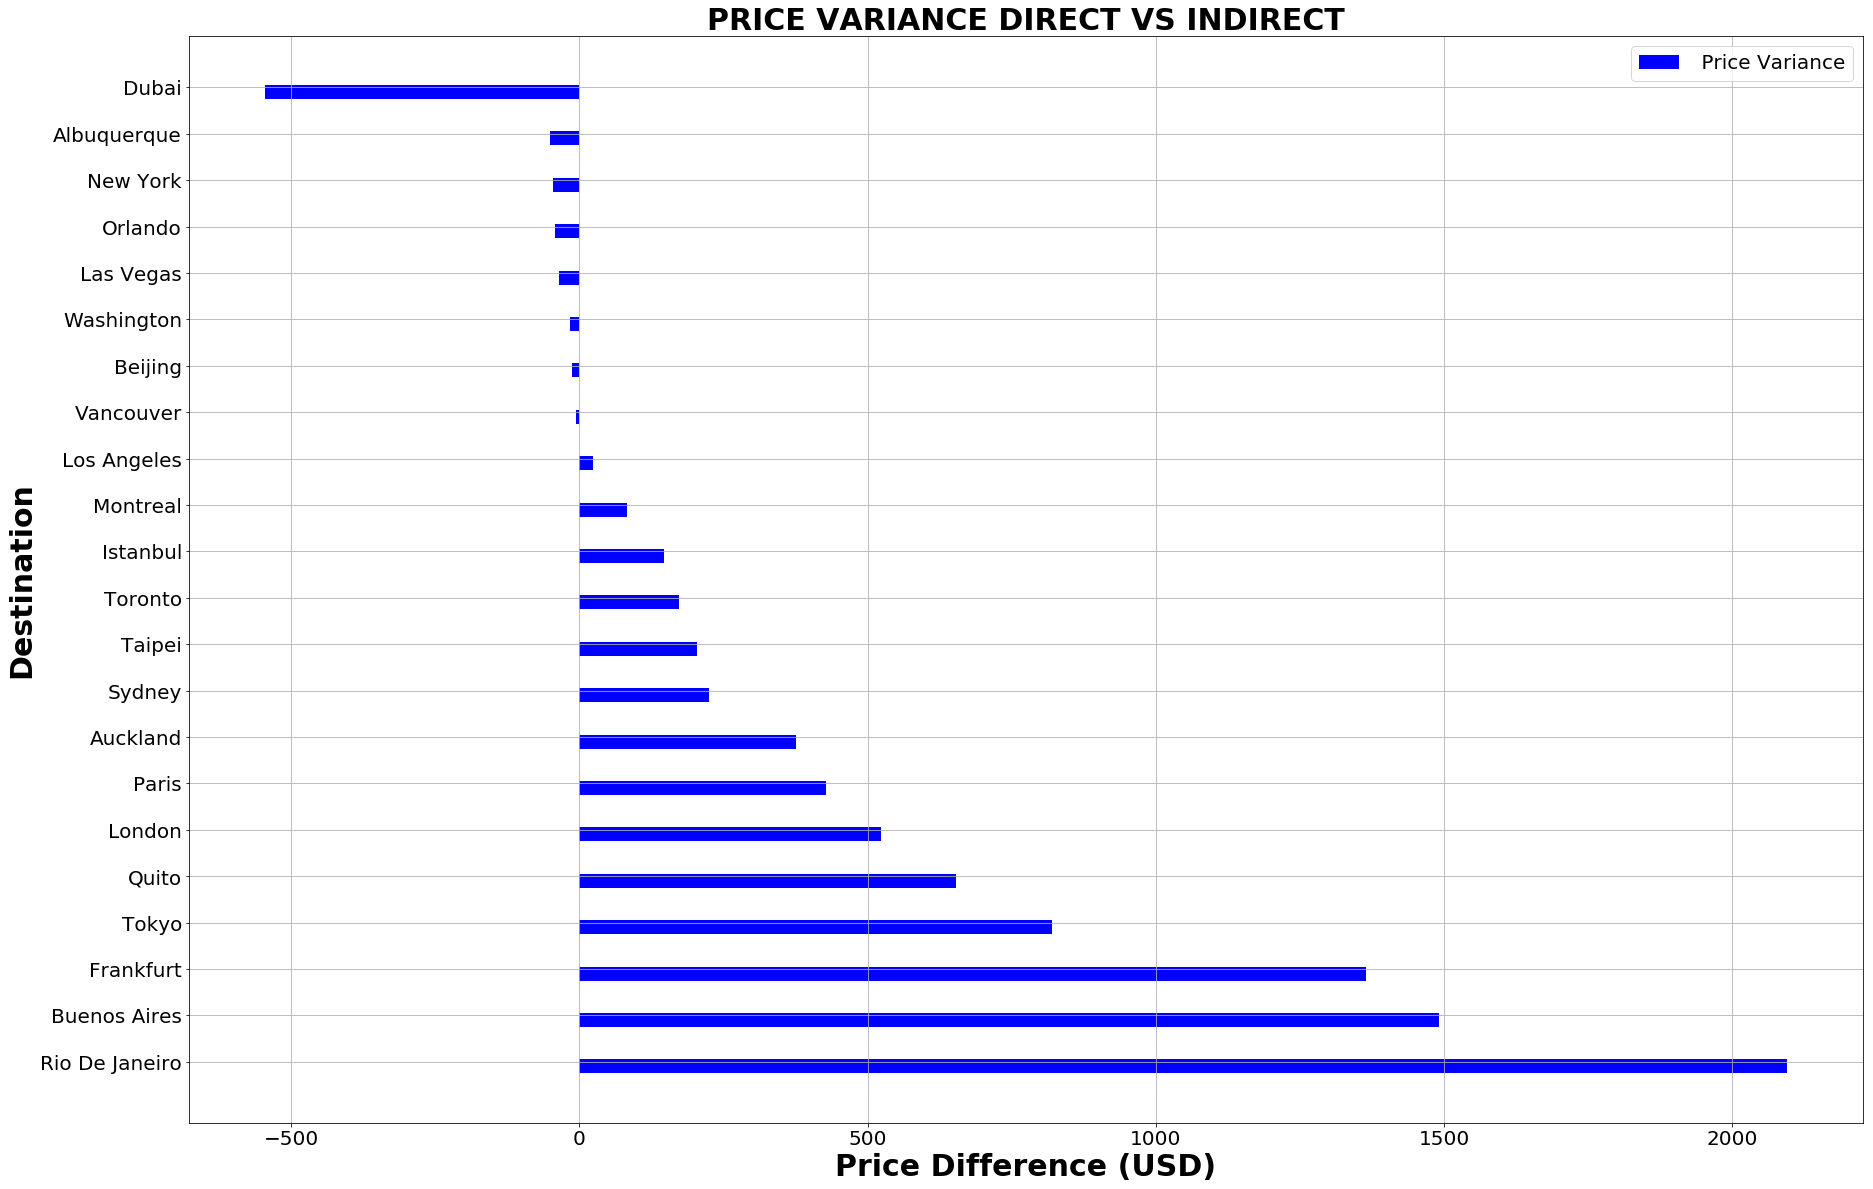

In [44]:
plt.figure(figsize=(30,20))
plt.rcParams.update({'font.size': 20})

destination = np.arange(len(variance_df))

width = 0.3

plt.barh(destination, variance_df["Price Variance"], width, color='blue', label=' Price Variance')


tick_locations = [value+0.1 for value in destination]
plt.yticks(tick_locations, variance_df["Destination"], rotation="horizontal")

plt.title("PRICE VARIANCE DIRECT VS INDIRECT",fontsize = 30, fontweight = 'bold')
plt.ylabel("Destination",fontsize = 30, fontweight = 'bold')
plt.xlabel("Price Difference (USD)",fontsize = 30, fontweight = 'bold')
plt.grid()
plt.legend()
plt.savefig("images/pricedifferencedirectindirect.png", bbox_inches="tight")
plt.show()

In [45]:
# IAH Carriers based on Quates avaiable
city_data=pd.DataFrame(city_data.groupby('Airline Name')['Iata Code'].count())
carrier=city_data.sort_values(["Iata Code"], ascending=[False])
carrier.reset_index(inplace=True)
carrier.head()

,Airline Name,Iata Code
0,United,160
1,Spirit Airlines,68
2,Turkish Airlines,56
3,EVA Air,49
4,jetBlue,46


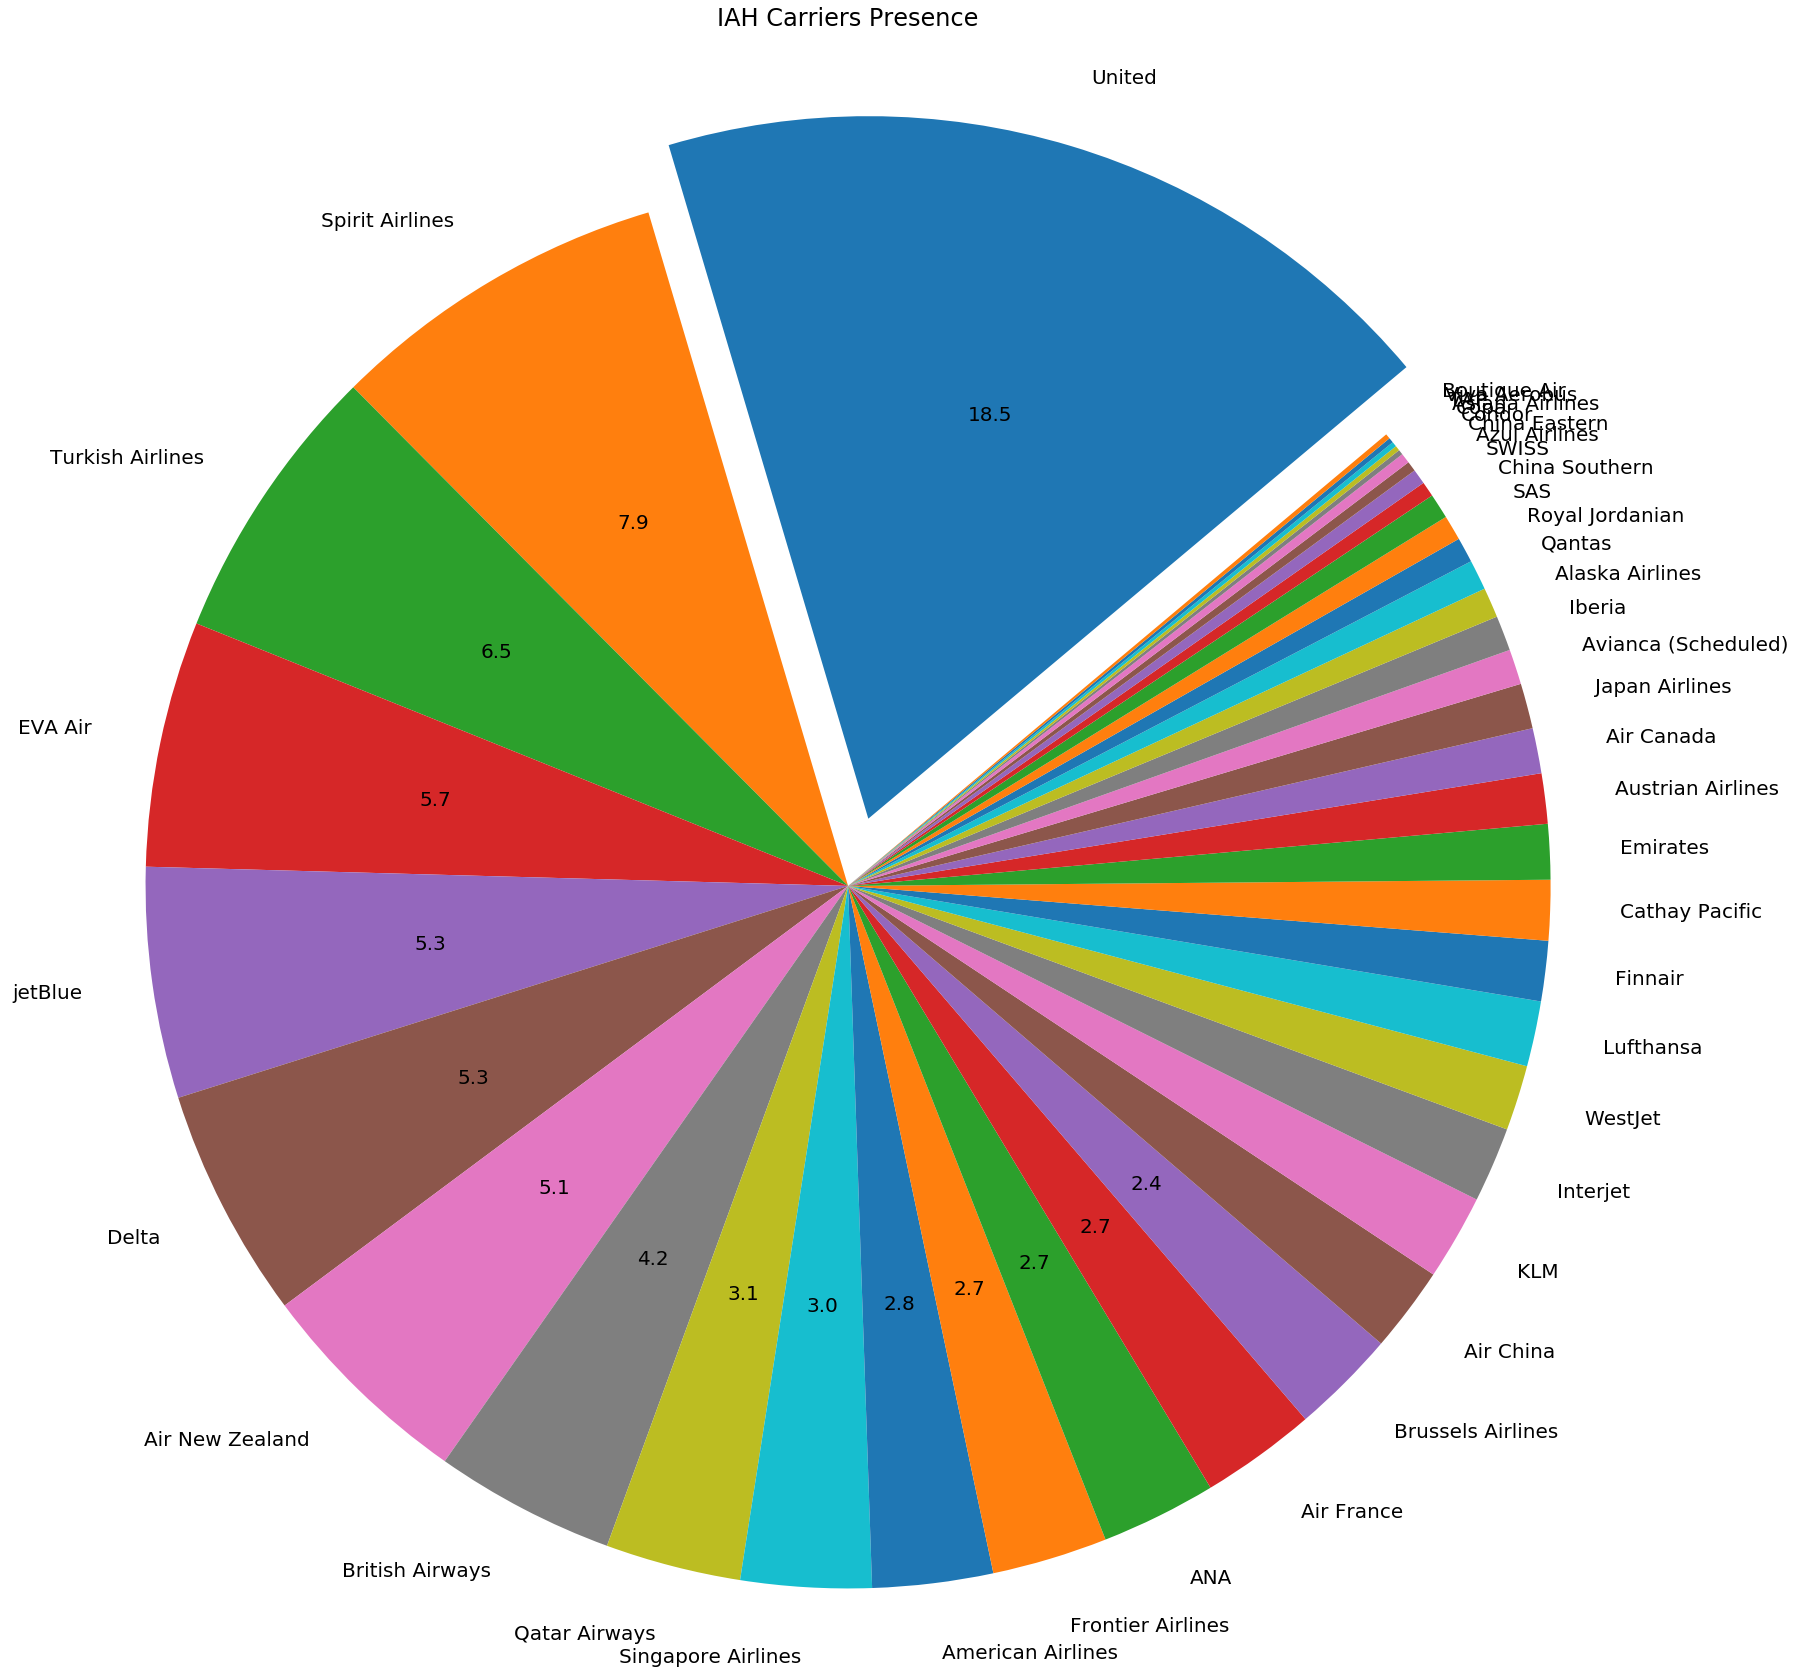

In [46]:
from matplotlib import cm

def my_autopct(pct):
    return ('%.1f'% pct) if pct > 2.1 else ''

plt.figure(figsize=(30,30))
plt.rcParams.update({'font.size': 20})

pies = carrier["Airline Name"]
pie_counts = carrier["Iata Code"]

explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ) 

plt.pie(pie_counts, labels=pies, explode=explode, autopct=my_autopct, shadow=False, startangle=40)

# centre_circle = plt.Circle((0,0),0.70,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

plt.axis("equal")

plt.title("IAH Carriers Presence")
plt.show()

In [47]:
pre_direct_df

,Departure City,City ID,Destination,Airport Name,Iata Code,Country Name,City ID Departure,Min Price,Airline ID,Non-Stop Flight,Departure Date,Quote ID,Airline Name
40,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,548,1710,True,12/1/2019,2,Brussels Airlines
41,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,494,1523,True,12/2/2019,3,Austrian Airlines
42,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,424,1384,True,12/3/2019,4,SWISS
44,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,407,1710,True,12/4/2019,6,Brussels Airlines
46,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,407,1710,True,12/5/2019,8,Brussels Airlines
48,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,1989,881,True,12/6/2019,10,British Airways
50,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,1989,881,True,12/7/2019,12,British Airways
52,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,1989,881,True,12/9/2019,14,British Airways
53,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,424,1384,True,12/10/2019,15,SWISS
55,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,1965,881,True,12/11/2019,17,British Airways


In [48]:
directcarrier_df=pre_direct_df[(pre_direct_df['Country Name'] != 'United States')]
directcarrier_df

,Departure City,City ID,Destination,Airport Name,Iata Code,Country Name,City ID Departure,Min Price,Airline ID,Non-Stop Flight,Departure Date,Quote ID,Airline Name
40,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,548,1710,True,12/1/2019,2,Brussels Airlines
41,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,494,1523,True,12/2/2019,3,Austrian Airlines
42,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,424,1384,True,12/3/2019,4,SWISS
44,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,407,1710,True,12/4/2019,6,Brussels Airlines
46,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,407,1710,True,12/5/2019,8,Brussels Airlines
48,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,1989,881,True,12/6/2019,10,British Airways
50,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,1989,881,True,12/7/2019,12,British Airways
52,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,1989,881,True,12/9/2019,14,British Airways
53,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,424,1384,True,12/10/2019,15,SWISS
55,Houston,65698,London,London Heathrow,LHR,United Kingdom,58440,1965,881,True,12/11/2019,17,British Airways


In [49]:
directcarrier_df=pd.DataFrame(directcarrier_df.groupby('Airline Name')['Iata Code'].count())
directcarrier_df=directcarrier_df.sort_values(["Iata Code"], ascending=[False])
directcarrier_df.reset_index(inplace=True)
directcarrier_df.head()

,Airline Name,Iata Code
0,United,63
1,Air New Zealand,32
2,Brussels Airlines,13
3,ANA,12
4,EVA Air,12


In [50]:
len(directcarrier_df)

18

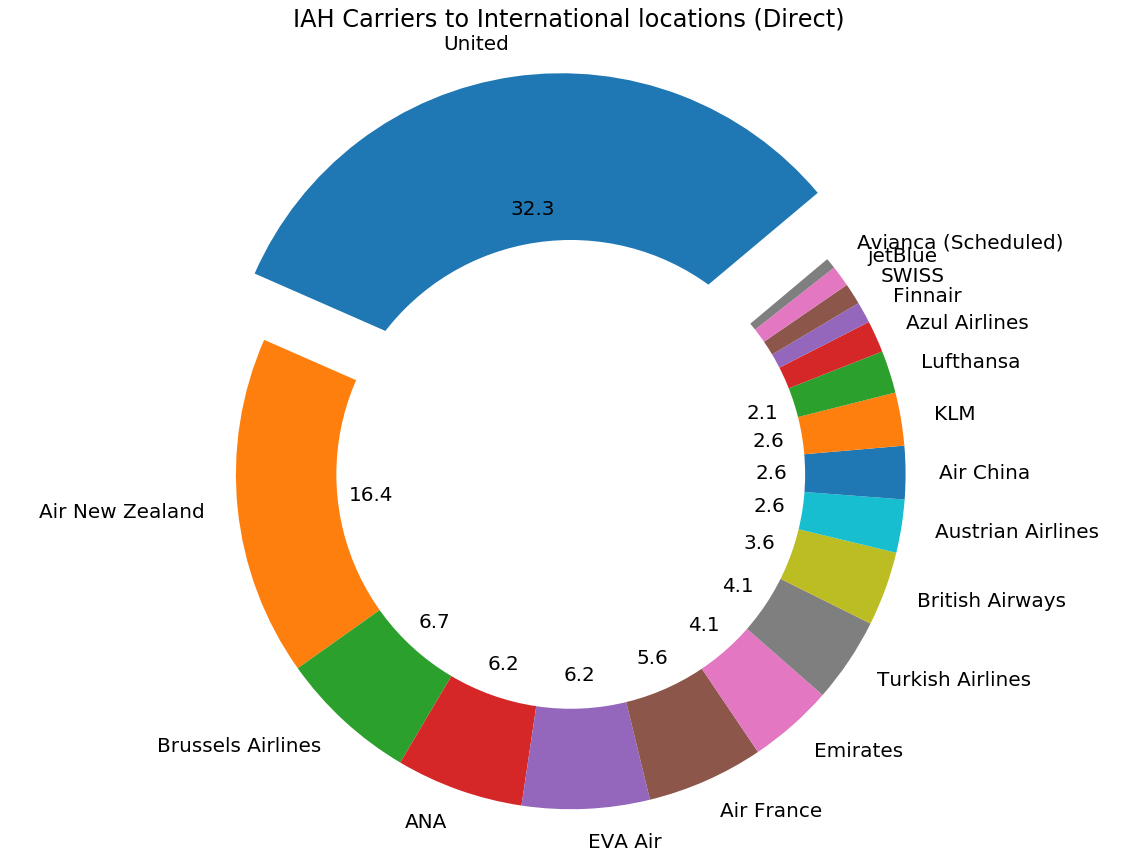

In [51]:
from matplotlib import cm

def my_autopct(pct):
    return ('%.1f'% pct) if pct > 2.0 else ''

plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 20})

pies = directcarrier_df["Airline Name"]
pie_counts = directcarrier_df["Iata Code"]

explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ) 

plt.pie(pie_counts, labels=pies, explode=explode,
        autopct=my_autopct, shadow=False, startangle= 40)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis("equal")

plt.title("IAH Carriers to International locations (Direct)")
plt.show()